In [1]:
# Add root directory of project to sys path so that Jupyter notebook can import from root/src/..
import sys
import os

# Get the absolute path of the parent directory of the current notebook
notebook_dir = os.path.abspath('')
project_root = os.path.dirname(notebook_dir)  # Assumes the notebook is in root/notebooks

# Add the project root to the sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
# Import environment and synthesizer
from src.environment import Environment
from src.synthesizers.super_simple_synth import SuperSimpleSynth

# Import packages for plotting
from src.utils.audio_processor import AudioProcessor
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
# Create synthesizer object
SAMPLING_RATE = 44100.0
synth = SuperSimpleSynth(sample_rate=SAMPLING_RATE)

# Create environment object and pass synthesizer object
env = Environment(synthesizer=synth)

DEBUG: PARAMETERS: [0.11149389 0.78603655 0.39819711]
DEBUG: PARAMETERS: [0.4012782  0.35153621 0.21993008]


Step: 3
Sim score: 0.001375442287018277, penalty: 0.15000000000000002, reward: -0.14862455771298175


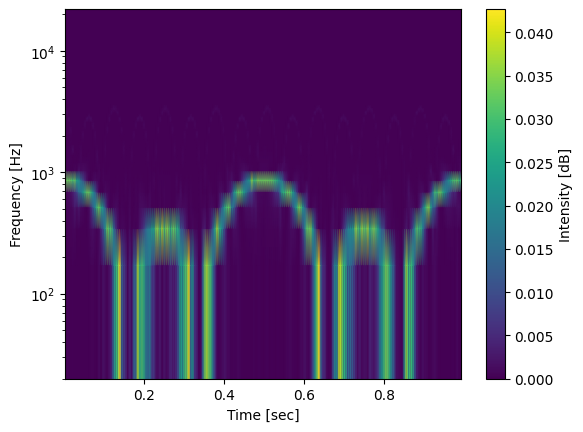

In [8]:
# Reset env and return waveform
state, reward, done = env.step([0.5, 0.2, 0.3])

# Plot the spectrogram using our custom AudioProcessor class
audio = AudioProcessor(audio_sample=state, sampling_freq=SAMPLING_RATE)
audio.calculate_spectrogram()

# Call plotting functions
plt.pcolormesh(audio.spectrogram.time, audio.spectrogram.frequency, audio.spectrogram.spec_dens, shading='gouraud')
plt.yscale('log')
plt.ylim(bottom=20, top=SAMPLING_RATE/2) # 20 Hz is lower limit of human hearing
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

In [5]:
state.size

44100

In [6]:
env.get_synth_params()

array([0.5, 0.5, 0.5])